<h1>個人最終レポート課題</h1>
南 昂汰 1922076

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.cluster import KMeans

In [ ]:
# 分析対象候補データ3 (Ad Conversion Data):
# https://www.kaggle.com/loveall/clicks-conversion-tracking
df = pd.read_csv('KAG_conversion_data.csv')
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [ ]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,cluster_id
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007,1.568679
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708,0.781999
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000,1.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000,2.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000,2.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000,3.000000


In [ ]:
# 欠損値を調べる
df.isnull().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [ ]:
array1 = np.array([df['Impressions'].tolist(),
                   df['Clicks'].tolist(),
                   df['Spent'].tolist(),
                   df['Total_Conversion'].tolist(),
                   df['Approved_Conversion'].tolist(),
                   ], np.float32)
#行列を転置
array1=array1.T
array1

array([[7.35000e+03, 1.00000e+00, 1.43000e+00, 2.00000e+00, 1.00000e+00],
       [1.78610e+04, 2.00000e+00, 1.82000e+00, 2.00000e+00, 0.00000e+00],
       [6.93000e+02, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00],
       ...,
       [1.51531e+05, 2.80000e+01, 4.02900e+01, 2.00000e+00, 0.00000e+00],
       [7.90253e+05, 1.35000e+02, 1.98710e+02, 8.00000e+00, 2.00000e+00],
       [5.13161e+05, 1.14000e+02, 1.65610e+02, 5.00000e+00, 2.00000e+00]],
      dtype=float32)

In [ ]:
#クラスター数を決めてクラスタリング
NofC=4
pred = KMeans(n_clusters=NofC).fit_predict(array1)
df['cluster_id']=pred

In [ ]:
df2=df.copy(deep=True)
del(df2['ad_id'])
del(df2['xyz_campaign_id'])
del(df2['fb_campaign_id'])
del(df2['interest'])
del(df2['age'])
del(df2['gender'])
df2

,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,cluster_id
0,7350,1,1.430000,2,1,2
1,17861,2,1.820000,2,0,2
2,693,0,0.000000,1,0,2
3,4259,1,1.250000,1,0,2
4,4133,1,1.290000,1,1,2
...,...,...,...,...,...,...
1138,1129773,252,358.189997,13,2,1
1139,637549,120,173.880003,3,0,0
1140,151531,28,40.289999,2,0,2
1141,790253,135,198.710000,8,2,1


In [ ]:
df3=df.copy(deep=True)
del(df3['ad_id'])
del(df3['xyz_campaign_id'])
del(df3['fb_campaign_id'])
del(df3['interest'])
del(df3['Impressions'])
del(df3['Clicks'])
del(df3['Spent'])
del(df3['Total_Conversion'])
del(df3['Approved_Conversion'])
# カテゴリ変数を展開
df3=pd.get_dummies(df3, columns = ['age', 'gender'])
df3

,cluster_id,age_30-34,age_35-39,age_40-44,age_45-49,gender_F,gender_M
0,2,1,0,0,0,0,1
1,2,1,0,0,0,0,1
2,2,1,0,0,0,0,1
3,2,1,0,0,0,0,1
4,2,1,0,0,0,0,1
...,...,...,...,...,...,...,...
1138,1,0,0,0,1,1,0
1139,0,0,0,0,1,1,0
1140,2,0,0,0,1,1,0
1141,1,0,0,0,1,1,0


In [ ]:
df4=df.copy(deep=True)
del(df4['ad_id'])
del(df4['fb_campaign_id'])
del(df4['interest'])
del(df4['Impressions'])
del(df4['Clicks'])
del(df4['Spent'])
del(df4['Total_Conversion'])
del(df4['Approved_Conversion'])
del(df4['age'])
del(df4['gender'])
# カテゴリ変数を展開
df4=pd.get_dummies(df4, columns = ['xyz_campaign_id'])
df4

,cluster_id,xyz_campaign_id_916,xyz_campaign_id_936,xyz_campaign_id_1178
0,2,1,0,0
1,2,1,0,0
2,2,1,0,0
3,2,1,0,0
4,2,1,0,0
...,...,...,...,...
1138,1,0,0,1
1139,0,0,0,1
1140,2,0,0,1
1141,1,0,0,1


In [ ]:
df['xyz_campaign_id'].value_counts()

1178    625
936     464
916      54
Name: xyz_campaign_id, dtype: int64

In [ ]:
#正規化
df2['Impressions']=df['Impressions']/1000
df2['Clicks']=df['Clicks']*10
df2['Spent']=df['Spent']*5
df2['Total_Conversion']=df['Total_Conversion']*50
df2['Approved_Conversion']=df['Approved_Conversion']*120

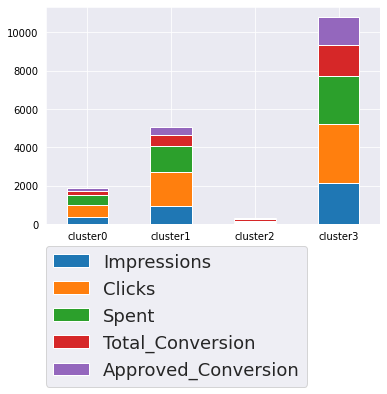

In [ ]:
clusterinfo = pd.DataFrame()
for i in range(NofC):
    clusterinfo['cluster' + str(i)] = df2[df2['cluster_id'] == i].mean()
clusterinfo = clusterinfo.drop('cluster_id')
 
my_plot = clusterinfo.T.plot(kind='bar', stacked=True, title="")
my_plot.set_xticklabels(my_plot.xaxis.get_majorticklabels(), rotation=0)
plt.legend(bbox_to_anchor=(0, -0.1), loc='upper left', borderaxespad=0, fontsize=18)
sns.set_style("darkgrid")
plt.tick_params(colors='black')

In [ ]:
df['cluster_id'].value_counts()

2    841
0    203
1     93
3      6
Name: cluster_id, dtype: int64

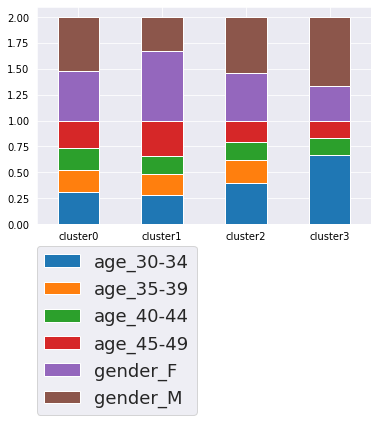

In [ ]:
clusterinfo = pd.DataFrame()
for i in range(NofC):
    clusterinfo['cluster' + str(i)] = df3[df3['cluster_id'] == i].mean()
clusterinfo = clusterinfo.drop('cluster_id')
 
my_plot = clusterinfo.T.plot(kind='bar', stacked=True, title="")
my_plot.set_xticklabels(my_plot.xaxis.get_majorticklabels(), rotation=0)
plt.legend(bbox_to_anchor=(0, -0.1), loc='upper left', borderaxespad=0, fontsize=18)
sns.set_style("darkgrid")
plt.tick_params(colors='black')

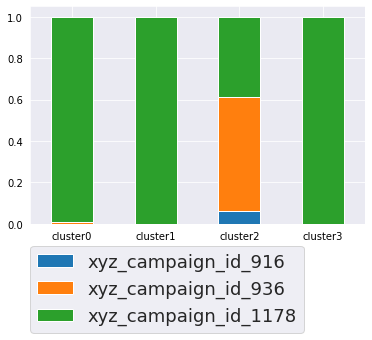

In [ ]:
clusterinfo = pd.DataFrame()
for i in range(NofC):
    clusterinfo['cluster' + str(i)] = df4[df4['cluster_id'] == i].mean()
clusterinfo = clusterinfo.drop('cluster_id')
 
my_plot = clusterinfo.T.plot(kind='bar', stacked=True, title="")
my_plot.set_xticklabels(my_plot.xaxis.get_majorticklabels(), rotation=0)
plt.legend(bbox_to_anchor=(0, -0.1), loc='upper left', borderaxespad=0, fontsize=18)
sns.set_style("darkgrid")
plt.tick_params(colors='black')

In [ ]:
df[ df['cluster_id']==0 ].mean()

ad_id                  1.148451e+06
xyz_campaign_id        1.175616e+03
fb_campaign_id         1.498828e+05
interest               3.934483e+01
Impressions            3.661416e+05
Clicks                 6.521182e+01
Spent                  1.007867e+02
Total_Conversion       4.236453e+00
Approved_Conversion    1.330049e+00
cluster_id             0.000000e+00
dtype: float64

In [ ]:
df[ df['cluster_id']==1 ].mean()

ad_id                  1.156975e+06
xyz_campaign_id        1.178000e+03
fb_campaign_id         1.511037e+05
interest               3.766667e+01
Impressions            9.489708e+05
Clicks                 1.762473e+02
Spent                  2.692053e+02
Total_Conversion       1.127957e+01
Approved_Conversion    3.537634e+00
cluster_id             1.000000e+00
dtype: float64

In [ ]:
df[ df['cluster_id']==2 ].mean()

ad_id                  928628.241379
xyz_campaign_id          1028.235434
fb_campaign_id         127905.644471
interest                   30.728894
Impressions             44997.542212
Clicks                      7.990488
Spent                      12.134031
Total_Conversion            1.380499
Approved_Conversion         0.482759
cluster_id                  2.000000
dtype: float64

In [ ]:
df[ df['cluster_id']==3 ].mean()

ad_id                  1.121482e+06
xyz_campaign_id        1.178000e+03
fb_campaign_id         1.446013e+05
interest               1.983333e+01
Impressions            2.168477e+06
Clicks                 3.026667e+02
Spent                  5.007883e+02
Total_Conversion       3.233333e+01
Approved_Conversion    1.233333e+01
cluster_id             3.000000e+00
dtype: float64